In [92]:
pip install albumentations



  Using cached albumentations-2.0.5-py3-none-any.whl.metadata (41 kB)
  Using cached pydantic-2.11.3-py3-none-any.whl.metadata (65 kB)
  Using cached albucore-0.0.23-py3-none-any.whl.metadata (5.3 kB)
  Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
Using cached albumentations-2.0.5-py3-none-any.whl (290 kB)
Using cached albucore-0.0.23-py3-none-any.whl (14 kB)
Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl (39.4 MB)
Using cached pydantic-2.11.3-py3-none-any.whl (443 kB)
Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\chetu\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\cv2\\cv2.pyd'
Check the permissions.


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\chetu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


#  Load and Preprocess Dataset

In [38]:
import cv2
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Define eye color labels
eye_colors = ["blue", "brown", "green", "gray"]
image_size = (128, 128)

# Load dataset
def load_images(data_path):
    images = []
    labels = []
    
    for label, color in enumerate(eye_colors):
        color_path = os.path.join(data_path, color)
        if not os.path.exists(color_path):
            continue
        
        for file in os.listdir(color_path):
            img_path = os.path.join(color_path, file)
            img = cv2.imread(img_path)
            if img is None:
                continue
            
            img = cv2.resize(img, image_size)
            images.append(img)
            labels.append(label)
    
    return np.array(images), np.array(labels)
# Path to dataset
dataset_path = "./eye_images"
X, y = load_images(dataset_path)

# Normalize images
X = X / 255.0

# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dataset has been extracted and loaded successfully!")

Dataset has been extracted and loaded successfully!


# READ RANDOM IMAGES FROM DATASET

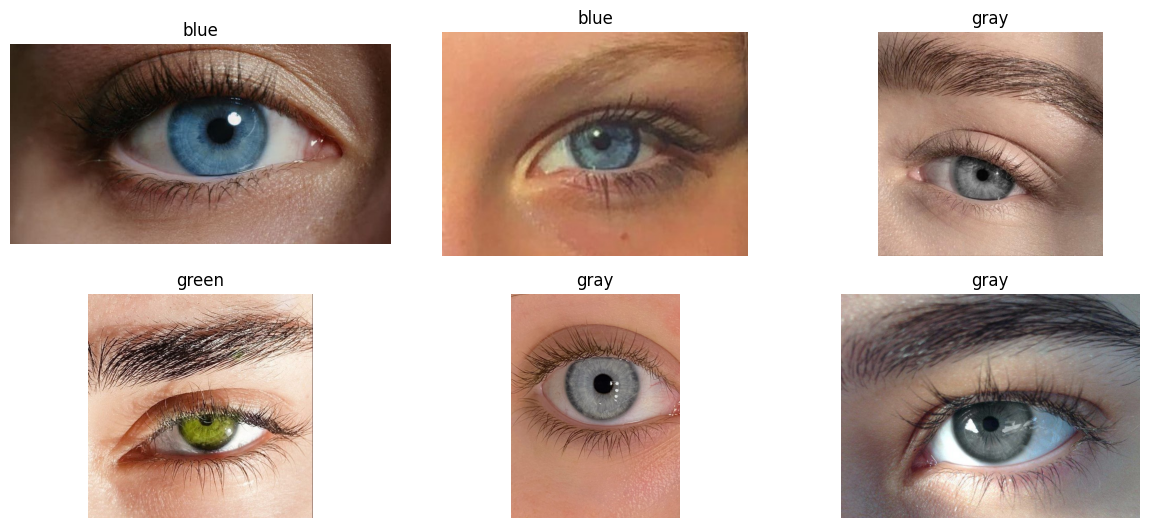

In [39]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_img(DATASET_PATH, num_images=6):
    image_paths = []
    labels = []

    # Walk through dataset directory and collect image paths and labels
    for root, dirs, files in os.walk(DATASET_PATH):
        for file in files:
            if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp')):
                full_path = os.path.join(root, file)
                label = os.path.basename(root)
                image_paths.append(full_path)
                labels.append(label)

    # Select random indices
    selected_indices = random.sample(range(len(image_paths)), min(num_images, len(image_paths)))

    # Plotting
    plt.figure(figsize=(12, 8))
    for i, idx in enumerate(selected_indices):
        img = mpimg.imread(image_paths[idx])
        plt.subplot(3, 3, i+1)
        plt.imshow(img)
        plt.title(labels[idx])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage
display_img(dataset_path, num_images=6)



# BAR PLOT

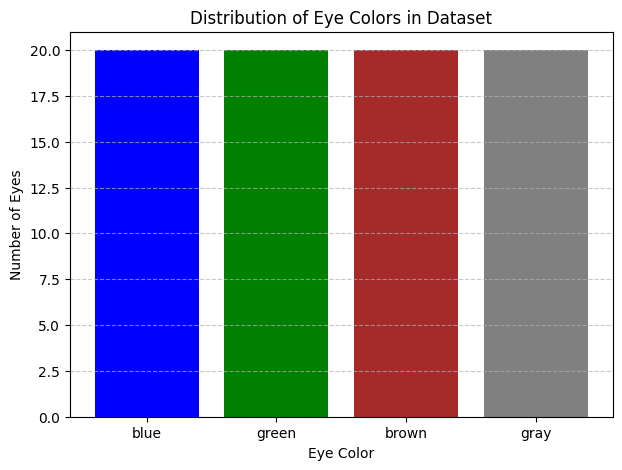

In [40]:
from collections import Counter

# Count the occurrences of each label
label_map_reverse = {0: "blue", 1: "green", 2: "brown", 3:"gray"}
label_counts = Counter(y)

# Extract labels and counts
labels = [label_map_reverse[key] for key in label_counts.keys()]
counts = list(label_counts.values())

# Plot the bar chart
plt.figure(figsize=(7, 5))
plt.bar(labels, counts, color=["blue", "green", "brown","gray"])  # Set colors
plt.xlabel("Eye Color")
plt.ylabel("Number of Eyes")
plt.title("Distribution of Eye Colors in Dataset")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# DATA AUGMENTATION

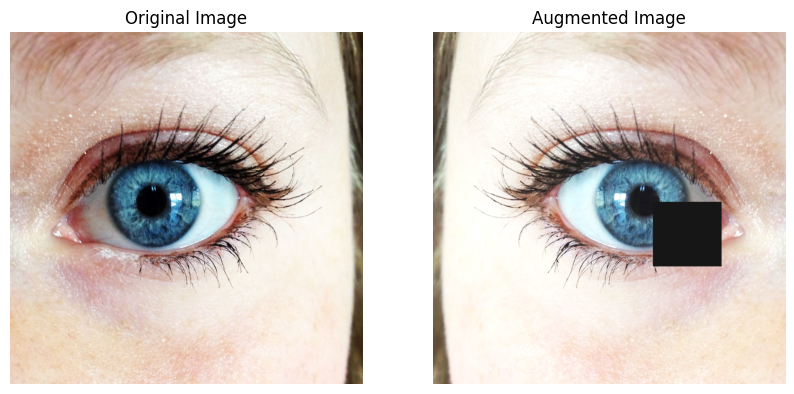

In [94]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

def random_brightness_contrast(img):
    alpha = 1.0 + random.uniform(-0.3, 0.3)  # Contrast control
    beta = random.randint(-30, 30)           # Brightness control
    img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    return img

def random_gamma(img):
    gamma = random.uniform(0.7, 1.5)
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(img, table)

def coarse_dropout(img, max_holes=5, max_size=0.2):
    h, w, _ = img.shape
    img_copy = img.copy()
    for _ in range(random.randint(1, max_holes)):
        mask_h = int(random.uniform(0.05, max_size) * h)
        mask_w = int(random.uniform(0.05, max_size) * w)
        top = random.randint(0, h - mask_h)
        left = random.randint(0, w - mask_w)
        img_copy[top:top+mask_h, left:left+mask_w] = 0
    return img_copy

# Define custom augmentation function
def apply_custom_augmentations(img):
    if random.random() < 0.2:
        img = cv2.flip(img, 0)  # Vertical flip
    if random.random() < 0.7:
        img = cv2.flip(img, 1)  # Horizontal flip
    if random.random() < 0.5:
        img = coarse_dropout(img)
    if random.random() < 0.5:
        img = random_gamma(img)
    if random.random() < 1.0:
        img = random_brightness_contrast(img)
    return img

# Load the image
img_path = "./eye_images/blue/blue1.jpg"
img = cv2.imread(img_path)

# Check if image is loaded correctly
if img is None:
    print(f"Error: Could not load image at {img_path}")
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Apply custom augmentations
    augmented = apply_custom_augmentations(img)

    # Display images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(augmented)
    axes[1].set_title("Augmented Image")
    axes[1].axis("off")

    plt.show()


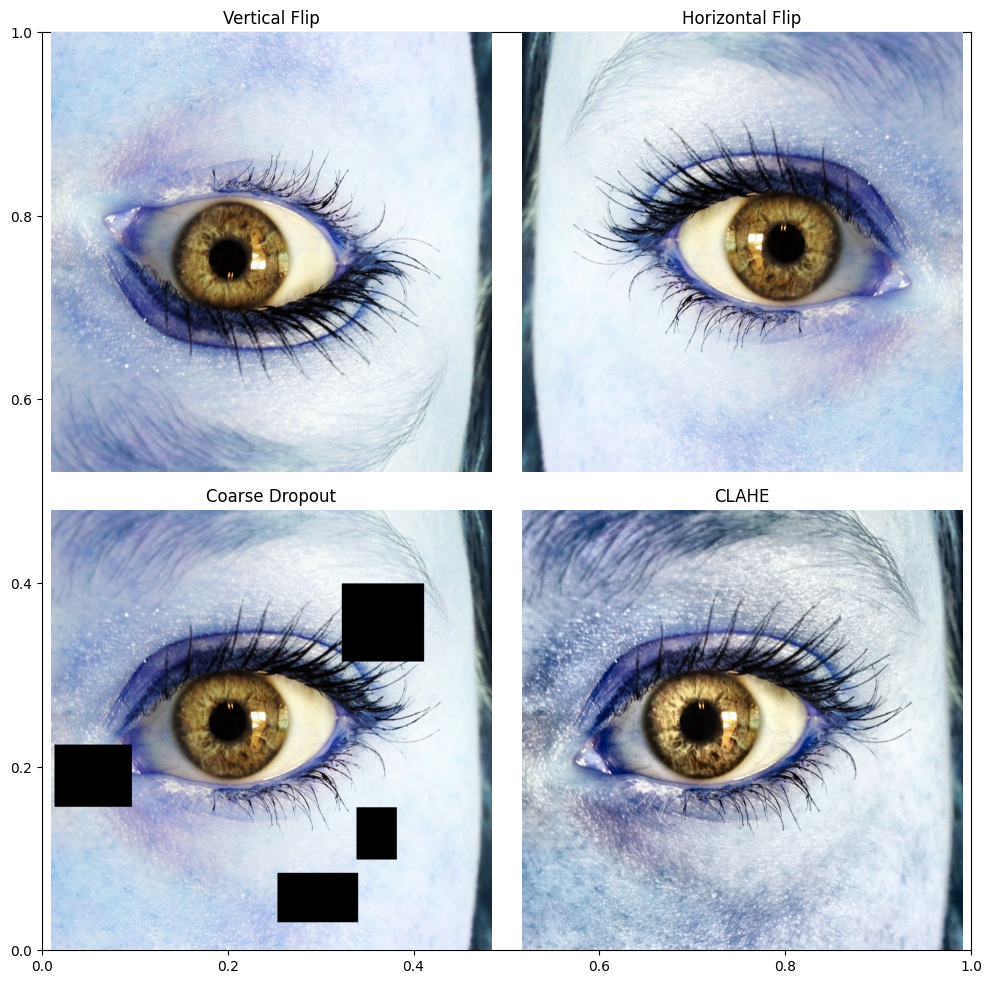

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Check if loaded
if img is None:
    print(f"Error loading image: {img_path}")
    exit()

# Convert BGR to RGB for display
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Augmentation functions
def vertical_flip(image):
    return cv2.flip(image, 0)

def horizontal_flip(image):
    return cv2.flip(image, 1)

def coarse_dropout(image, max_holes=5, max_size=0.2):
    h, w, _ = image.shape
    img_copy = image.copy()
    for _ in range(random.randint(1, max_holes)):
        mask_h = int(random.uniform(0.05, max_size) * h)
        mask_w = int(random.uniform(0.05, max_size) * w)
        top = random.randint(0, h - mask_h)
        left = random.randint(0, w - mask_w)
        img_copy[top:top+mask_h, left:left+mask_w] = 0
    return img_copy

def apply_clahe(image):
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)

    merged = cv2.merge((cl, a, b))
    final = cv2.cvtColor(merged, cv2.COLOR_LAB2RGB)
    return final

# Define augmentations
augments = [
    ("Vertical Flip", vertical_flip),
    ("Horizontal Flip", horizontal_flip),
    ("Coarse Dropout", coarse_dropout),
    ("CLAHE", apply_clahe)
]

# Display all augmentations
plt.subplots(figsize=(10, 10))
for i, (name, aug_fn) in enumerate(augments):
    plt.subplot(2, 2, i + 1)
    aug_img = aug_fn(img)
    plt.imshow(aug_img)
    plt.title(name, fontsize=12)
    plt.axis("off")
plt.tight_layout()
plt.show()


In [99]:
#BUILDING INPUT PIPELINE
def aug_fn(img):
    aug_data = transforms_train(image=img)
    aug_img = aug_data['image']

    return aug_img


@tf.function
def process_data(img, label):
    aug_img = tf.numpy_function(aug_fn,
                                [img],
                                Tout=tf.float32)

    return img, label


def decode_image(filepath, label=None):

    img = tf.io.read_file(filepath)
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, [128, 128])
    img = tf.cast(img, tf.float32) / 255.0

    if label == None:
        return img

    return img, tf.one_hot(indices=label,
                           depth=120,
                           dtype=tf.float32)


# Building CNN Model

In [75]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(eye_colors), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# TRAIN THE MODEL

In [76]:
history=model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.1979 - loss: 1.5521 - val_accuracy: 0.1250 - val_loss: 1.6519
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step - accuracy: 0.2500 - loss: 1.4619 - val_accuracy: 0.5000 - val_loss: 1.3560
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step - accuracy: 0.3750 - loss: 1.3649 - val_accuracy: 0.5000 - val_loss: 1.3223
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step - accuracy: 0.5104 - loss: 1.3175 - val_accuracy: 0.3750 - val_loss: 1.2697
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step - accuracy: 0.4062 - loss: 1.2581 - val_accuracy: 0.4375 - val_loss: 1.1122
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step - accuracy: 0.4792 - loss: 1.1484 - val_accuracy: 0.4375 - val_loss: 1.1250
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step - accuracy: 0.4896 - loss: 1.0845 - val_accuracy: 0.6250 - val_loss: 1.0236
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 905ms/step - accuracy: 0.6250 - loss: 0.9787 - val_accuracy: 0.3750 - val_loss: 1.

# SAVE THE MODEL

In [77]:
import pickle

# Save history
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

# Load history in a new session
with open('history.pkl', 'rb') as f:
    history_data = pickle.load(f)
    
model.save('my_model.keras') 


In [78]:
#LOADS THE SAVED MODEL
from tensorflow.keras.models import load_model

model = load_model('my_model.keras')

In [79]:
print(model.input_shape)

(None, 128, 128, 3)


# EVALUATE THE MODEL

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X, y, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Extract loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get number of epochs
epochs = range(1, len(train_loss) + 1)

# 📌 Plot Training & Validation Loss
plt.figure(figsize=(8, 4))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')  # 'bo-' means blue circles
plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')  # 'r^-' means red triangles
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# 📌 Plot Training & Validation Accuracy
plt.figure(figsize=(8, 4))
plt.plot(epochs, train_acc, 'go-', label='Training Accuracy')  # 'go-' means green circles
plt.plot(epochs, val_acc, 'm^-', label='Validation Accuracy')  # 'm^-' means magenta triangles
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# TEST WITH NEW IMAGE

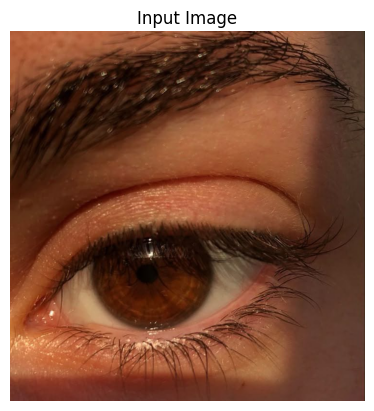

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Predicted Eye Color: green


In [83]:
def predict_eye_color_from_array(img):
    img = cv2.resize(img, image_size)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    return eye_colors[predicted_class]

test_image = cv2.imread("./predicting_images/img1.jpeg")
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

plt.imshow(test_image)
plt.axis('off')
plt.title("Input Image")
plt.show()

predicted_color = predict_eye_color_from_array(test_image)
print("Predicted Eye Color:", predicted_color)


In [81]:
img = cv2.resize(test_image, image_size)
img = img / 255.0
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)
color_classes = ["blue", "green", "brown", "gray"]
for i, prob in enumerate(prediction[0]):
    print(f"{color_classes[i]}: {prob:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
blue: 0.00
green: 0.07
brown: 0.40
gray: 0.54
